# SMARCB1
The SMARCB1 gene encodes a subunit of the SWI/SNF ATP-dependent chromatin-remodeling complex.
 heterozygous mutation in the SMARCB1 gene is associated with [Coffin-Siris syndrome 3](https://omim.org/entry/614608),
 [rhabdoid tumor predisposition syndrome-1](https://omim.org/entry/609322) and schwannomatosis.

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.7.1


### SMARCB1
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SMARCB1.

In [2]:
gene_symbol = 'SMARCB1'
mane_tx_id = 'NM_003073.5'
mane_protein_id = 'NP_003064.2' # SWI/SNF-related matrix-associated actin-dependent regulator of chromatin subfamily B member 1 isoform a [Homo sapiens]

In [4]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.21'  # Update, if necessary
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals')
qc.summarize()

Individuals Processed: 100%|██████████| 32/32 [00:12<00:00,  2.56individuals/s]
Loaded 32 individuals
Validated under permissive policy
No errors or warnings were found


In [5]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Feeding difficulties,HP:0011968,17
Global developmental delay,HP:0001263,17
Short stature,HP:0004322,12
Thick eyebrow,HP:0000574,12
Long eyelashes,HP:0000527,12
"Intellectual disability, severe",HP:0010864,12
Sparse scalp hair,HP:0002209,12
Hypotonia,HP:0001252,12
Atypical teratoid/rhabdoid tumor,HP:0034401,10
Microcephaly,HP:0000252,10


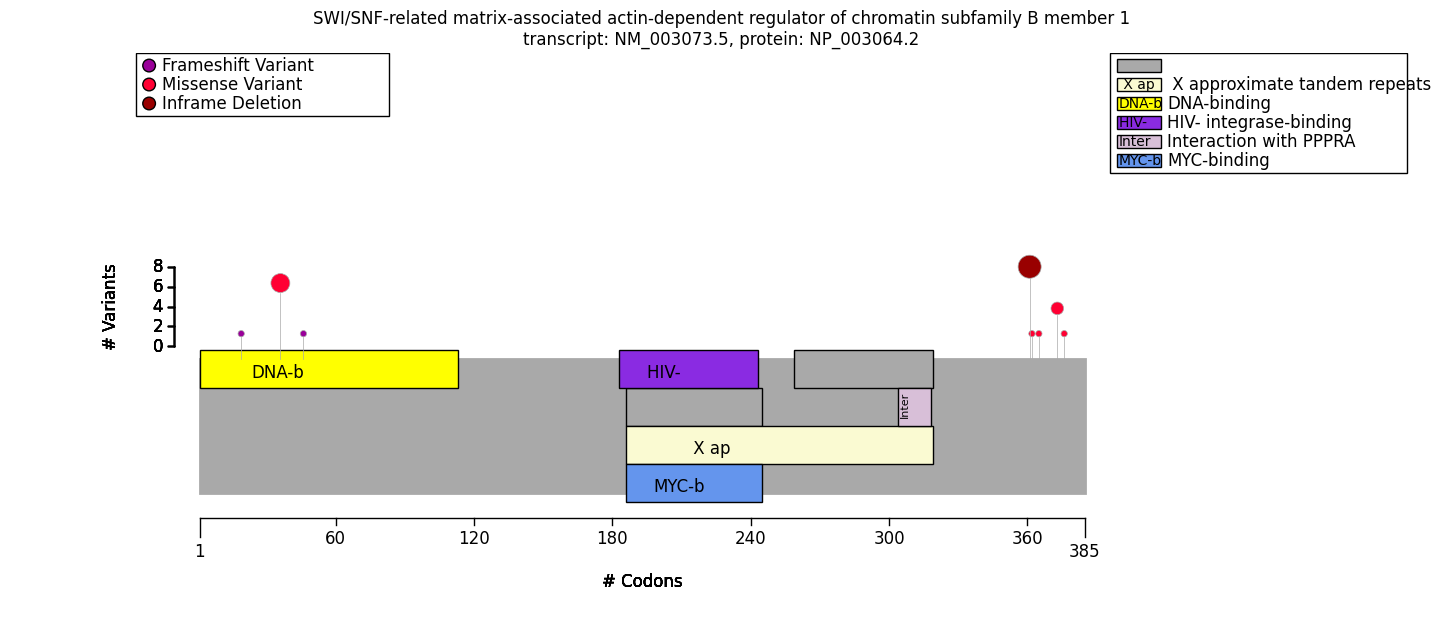

In [6]:
from gpsea.model.genome import GRCh38
from gpsea.model import ProteinMetadata
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)


smarcb1_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
smarcb1_fig.tight_layout()

In [7]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
viewer.process(cohort=cohort)

Name,Type,Coordinates,Count,Variants
DNA-binding,REGION,1 - 113,7,p.Tyr47SerfsTer8; p.Arg37His; p.Asp21GlyfsTer50
HIV-1 integrase-binding,REGION,183 - 243,0,
1,REPEAT,186 - 245,0,
2 X approximate tandem repeats,REGION,186 - 319,0,
MYC-binding,REGION,186 - 245,0,
2,REPEAT,259 - 319,0,
Interaction with PPP1R15A,REGION,304 - 318,0,


# Genotype-Phenotype Correlation (GPC) Analysis

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [ ]:
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate

k364del = VariantPredicates.variant_key(key="22_23833669_23833672_GAGA_G") #	22_23833669_23833672_GAGA_G	c.1091_1093del	p.Lys364del

k364del_predicate = monoallelic_predicate(
    a_predicate=k364del,
    b_predicate=~k364del,
    a_label="Lys364del",
    b_label="Other"
)
k364del_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=k364del_predicate,
    pheno_predicates=pheno_predicates,
)
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
viewer.process(k364del_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,56
HMF03,Skipping term because of a child term with the same individual counts,9
HMF08,Skipping general term,82
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,211


In [10]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=k364del_result)

Allele group                                       Lys364del          Other  \
                                                       Count Percent  Count   
Embryonal neoplasm [HP:0002898]                          0/7      0%  10/20   
Atypical teratoid/rhabdoid tumor [HP:0034401]            0/7      0%  10/21   
Neoplasm by histology [HP:0011792]                       1/8     12%  14/24   
Depressed nasal bridge [HP:0005280]                      0/7      0%    3/6   
Ventricular septal defect [HP:0001629]                   0/7      0%    3/6   
Intellectual disability, severe [HP:0010864]             7/7    100%    5/8   
Visual impairment [HP:0000505]                           3/6     50%    7/8   
Atrial septal defect [HP:0001631]                        1/7     14%   4/10   
Thick eyebrow [HP:0000574]                               7/7    100%    5/6   
Long eyelashes [HP:0000527]                              7/7    100%    5/6   
Hypotonia [HP:0001252]                                   6/7     86%    6/9   
Morphological central nervous system abnormalit...       8/8    100%  11/11   
Growth delay [HP:0001510]                                8/8    100%    5/5   
Abnormal hair quantity [HP:0011362]                      8/8    100%    5/5   
Abnormal ocular adnexa morphology [HP:0030669]           7/7    100%    6/6   
Abnormal eyelid morphology [HP:0000492]                  7/7    100%    6/6   
Hearing impairment [HP:0000365]                          3/5     60%    6/8   
Intellectual disability [HP:0001249]                     8/8    100%  10/10   
Neurodevelopmental abnormality [HP:0012759]              8/8    100%  10/10   
Abnormal speech pattern [HP:0002167]                     7/7    100%    7/7   
Abnormal communication [HP:0034434]                      7/7    100%    7/7   
Delayed speech and language development [HP:000...       7/7    100%    7/7   
Neurodevelopmental delay [HP:0012758]                    8/8    100%  10/10   
Sparse scalp hair [HP:0002209]                           7/8     88%    5/6   
Abnormal axial skeleton morphology [HP:0009121]          8/8    100%    7/7   
Aplasia/Hypoplasia involving the central nervou...       8/8    100%    5/5   
Abnormal cerebral morphology [HP:0002060]                8/8    100%    7/7   
Abnormal forebrain morphology [HP:0100547]               8/8    100%    7/7   
Abnormal brain morphology [HP:0012443]                   8/8    100%  10/10   
Feeding difficulties [HP:0011968]                        8/8    100%    9/9   
Abnormal oral cavity morphology [HP:0000163]             7/7    100%    6/6   
Abnormality of the mouth [HP:0000153]                    7/7    100%    6/6   
Thick lower lip vermilion [HP:0000179]                   5/7     71%    4/6   
Global developmental delay [HP:0001263]                  8/8    100%    9/9   
Abnormal corpus callosum morphology [HP:0001273]         7/7    100%    6/6   
Ptosis [HP:0000508]                                      4/7     57%    3/6   

Allele group                                                                   \
                                                   Percent Corrected p values   
Embryonal neoplasm [HP:0002898]                        50%           0.492696   
Atypical teratoid/rhabdoid tumor [HP:0034401]          48%           0.492696   
Neoplasm by histology [HP:0011792]                     58%           0.492696   
Depressed nasal bridge [HP:0005280]                    50%           0.503497   
Ventricular septal defect [HP:0001629]                 50%           0.503497   
Intellectual disability, severe [HP:0010864]           62%           1.000000   
Visual impairment [HP:0000505]                         88%           1.000000   
Atrial septal defect [HP:0001631]                      40%           1.000000   
Thick eyebrow [HP:0000574]                             83%           1.000000   
Long eyelashes [HP:0000527]                            83%           1.000000   
Hypotonia [HP:0001252]   

In [12]:
from gpsea.model import VariantEffect
from gpsea.model.genome import Region

dna_binding = VariantPredicates.protein_feature(feature_id="DNA-binding", protein_metadata=protein_meta)
#(region=Region(1,164), tx_id=mane_tx_id)

dna_binding_predicate = monoallelic_predicate(
    a_predicate=dna_binding,
    b_predicate=~dna_binding,
    a_label="DNA binding",
    b_label="Other"
)
dna_binding_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=dna_binding_predicate,
    pheno_predicates=pheno_predicates,
)

summarize_hpo_analysis(hpo=hpo, result=dna_binding_result)

Allele group                                       DNA binding          Other  \
                                                         Count Percent  Count   
Thick eyebrow [HP:0000574]                                 0/1      0%  12/12   
Long eyelashes [HP:0000527]                                0/1      0%  12/12   
Sparse scalp hair [HP:0002209]                             0/1      0%  12/13   
Vesicoureteral reflux [HP:0000076]                         2/4     50%   1/10   
Visual impairment [HP:0000505]                             4/4    100%   6/10   
Thick lower lip vermilion [HP:0000179]                     0/1      0%   9/12   
Neoplasm by histology [HP:0011792]                         2/7     29%  13/25   
Ptosis [HP:0000508]                                        0/1      0%   7/12   
Intellectual disability, severe [HP:0010864]               4/4    100%   8/11   
Hypotonia [HP:0001252]                                     4/4    100%   8/12   
Hearing impairment [HP:0000365]                            2/4     50%    7/9   
Atrial septal defect [HP:0001631]                          2/5     40%   3/12   
Embryonal neoplasm [HP:0002898]                            2/7     29%   8/20   
Morphological central nervous system abnormalit...         5/5    100%  14/14   
Growth delay [HP:0001510]                                  1/1    100%  12/12   
Abnormal ocular adnexa morphology [HP:0030669]             1/1    100%  12/12   
Abnormal eyelid morphology [HP:0000492]                    1/1    100%  12/12   
Intellectual disability [HP:0001249]                       5/5    100%  13/13   
Neurodevelopmental abnormality [HP:0012759]                5/5    100%  13/13   
Abnormal speech pattern [HP:0002167]                       4/4    100%  10/10   
Abnormal communication [HP:0034434]                        4/4    100%  10/10   
Delayed speech and language development [HP:000...         4/4    100%  10/10   
Neurodevelopmental delay [HP:0012758]                      5/5    100%  13/13   
Abnormal axial skeleton morphology [HP:0009121]            2/2    100%  13/13   
Aplasia/Hypoplasia involving the central nervou...         1/1    100%  12/12   
Abnormal cerebral morphology [HP:0002060]                  2/2    100%  13/13   
Abnormal forebrain morphology [HP:0100547]                 2/2    100%  13/13   
Abnormal brain morphology [HP:0012443]                     5/5    100%  13/13   
Feeding difficulties [HP:0011968]                          4/4    100%  13/13   
Abnormal oral cavity morphology [HP:0000163]               1/1    100%  12/12   
Abnormality of the mouth [HP:0000153]                      1/1    100%  12/12   
Global developmental delay [HP:0001263]                    5/5    100%  12/12   
Abnormal corpus callosum morphology [HP:0001273]           2/2    100%  11/11   

Allele group                                                                   \
                                                   Percent Corrected p values   
Thick eyebrow [HP:0000574]                            100%                1.0   
Long eyelashes [HP:0000527]                           100%                1.0   
Sparse scalp hair [HP:0002209]                         92%                1.0   
Vesicoureteral reflux [HP:0000076]                     10%                1.0   
Visual impairment [HP:0000505]                         60%                1.0   
Thick lower lip vermilion [HP:0000179]                 75%                1.0   
Neoplasm by histology [HP:0011792]                     52%                1.0   
Ptosis [HP:0000508]                                    58%                1.0   
Intellectual disability, severe [HP:0010864]           73%                1.0   
Hypotonia [HP:0001252]                                 67%                1.0   
Hearing impairment [HP:0000365]                        78%                1.0   
Atrial septal defect [HP:0001631]                      25%                1.0   
Embryonal neoplasm [HP:0002898

In [14]:
amplifcation = VariantPredicates.variant_effect(VariantEffect.TRANSCRIPT_AMPLIFICATION, tx_id=mane_tx_id)
ablation = VariantPredicates.variant_effect(VariantEffect.TRANSCRIPT_ABLATION, tx_id=mane_tx_id)

is_struct_var = VariantPredicates.any((amplifcation, ablation))

sv_predicate = monoallelic_predicate(
    a_predicate=is_struct_var,
    b_predicate=~is_struct_var,
    a_label="Structural variant",
    b_label="Other"
)
sv_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=sv_predicate,
    pheno_predicates=pheno_predicates,
)

summarize_hpo_analysis(hpo=hpo, result=sv_result)

Allele group                                       Structural variant          \
                                                                Count Percent   
Neoplasm by histology [HP:0011792]                              11/11    100%   
Embryonal neoplasm [HP:0002898]                                   8/8    100%   
Atypical teratoid/rhabdoid tumor [HP:0034401]                     8/9     89%   
Rhabdoid tumor [HP:0034557]                                       4/4    100%   
Neuroepithelial neoplasm [HP:0030063]                             2/2    100%   
Neoplasm by anatomical site [HP:0011793]                          3/3    100%   
Neoplasm of the nervous system [HP:0004375]                       2/2    100%   
Schwannoma [HP:0100008]                                           1/1    100%   
Neoplasm of the peripheral nervous system [HP:0...                1/1    100%   
Morphological central nervous system abnormalit...                1/1    100%   

Allele group                                        Other          \
                                                    Count Percent   
Neoplasm by histology [HP:0011792]                   4/21     19%   
Embryonal neoplasm [HP:0002898]                      2/19     11%   
Atypical teratoid/rhabdoid tumor [HP:0034401]        2/19     11%   
Rhabdoid tumor [HP:0034557]                          2/19     11%   
Neuroepithelial neoplasm [HP:0030063]                0/17      0%   
Neoplasm by anatomical site [HP:0011793]             3/20     15%   
Neoplasm of the nervous system [HP:0004375]          2/19     11%   
Schwannoma [HP:0100008]                              2/19     11%   
Neoplasm of the peripheral nervous system [HP:0...   2/19     11%   
Morphological central nervous system abnormalit...  18/18    100%   

Allele group                                                           \
                                                   Corrected p values   
Neoplasm by histology [HP:0011792]                           0.000101   
Embryonal neoplasm [HP:0002898]                              0.000101   
Atypical teratoid/rhabdoid tumor [HP:0034401]                0.000396   
Rhabdoid tumor [HP:0034557]                                  0.004235   
Neuroepithelial neoplasm [HP:0030063]                        0.011696   
Neoplasm by anatomical site [HP:0011793]                     0.018822   
Neoplasm of the nervous system [HP:0004375]                  0.040816   
Schwannoma [HP:0100008]                                      0.166667   
Neoplasm of the peripheral nervous system [HP:0...           0.166667   
Morphological central nervous system abnormalit...           1.000000   

Allele group                                                  
                                                    p values  
Neoplasm by histology [HP:0011792]                  0.000011  
Embryonal neoplasm [HP:0002898]                     0.000020  
Atypical teratoid/rhabdoid tumor [HP:0034401]       0.000119  
Rhabdoid tumor [HP:0034557]                         0.001694  
Neuroepithelial neoplasm [HP:0030063]               0.005848  
Neoplasm by anatomical site [HP:0011793]            0.011293  
Neoplasm of the nervous system [HP:0004375]         0.028571  
Schwannoma [HP:0100008]                             0.150000  
Neoplasm of the peripheral nervous system [HP:0...  0.150000  
Morphological central nervous system abnormalit...  1.000000

## Summary

Our analysis of SMARCB1 included variants associated with [Coffin-Siris syndrome 3](https://omim.org/entry/614608),
 [rhabdoid tumor predisposition syndrome-1](https://omim.org/entry/609322) and [Schwannomatosis-1, susceptibility to](https://omim.org/entry/162091). Presumably the result of embryonal neoplasm being signficantly associated with structural variants relates to a different distribution of variants in [rhabdoid tumor predisposition syndrome-1](https://omim.org/entry/609322) than in  [Coffin-Siris syndrome 3](https://omim.org/entry/614608).


In [15]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=k364del_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=dna_binding_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=sv_result,
    ),
)

caption = "Our analysis of SMARCB1 included variants associated with Coffin-Siris syndrome 3 (OMIM:614608), " 
"rhabdoid tumor predisposition syndrome-1 (OMIM:609322) and Schwannomatosis-1, susceptibility to (OMIM:162091). " 
"Presumably the result of embryonal neoplasm being signficantly associated with structural variants relates to a " 
"different distribution of variants in rhabdoid tumor predisposition syndrome-1 than in Coffin-Siris syndrome 3."

report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [16]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [17]:
summarizer.process_latex(report=report, protein_fig=smarcb1_fig)

Figure saved to ../../supplement/img/SMARCB1_protein_diagram-draft.pdf
Output to ../../supplement/tex/SMARCB1_summary_draft.tex
